In [1]:
using Revise
using Plots
using Reparam
using LaTeXStrings
using Plots.PlotMeasures

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling Reparam [c49b29fa-1d3a-4ad9-af7c-a9d9e2a11c6b]
└ @ Base loading.jl:1278


In [2]:
using ProfileView

┌ Info: Precompiling ProfileView [c46f51b8-102a-5cf2-8d2c-8597cb0e0da7]
└ @ Base loading.jl:1278
Gtk-Message: 19:28:49.374: Failed to load module "appmenu-gtk-module"

(julia:24236): Gtk-WARNING **: 19:28:49.398: Theme parsing error: gtk-dark.css:1431:23: 'font-feature-settings' is not a valid property name

(julia:24236): Gtk-WARNING **: 19:28:49.402: Theme parsing error: gtk-dark.css:3271:25: 'font-feature-settings' is not a valid property name

(julia:24236): Gtk-WARNING **: 19:28:49.403: Theme parsing error: gtk-dark.css:3733:23: 'font-feature-settings' is not a valid property name
Gtk-Message: 19:28:49.444: Failed to load module "canberra-gtk-module"
Gtk-Message: 19:28:49.444: Failed to load module "canberra-gtk-module"
Gtk-Message: 19:28:53.585: Failed to load module "appmenu-gtk-module"

(julia:24400): Gtk-WARNING **: 19:28:53.593: Theme parsing error: gtk-dark.css:1431:23: 'font-feature-settings' is not a valid property name

(julia:24400): Gtk-WARNING **: 19:28:53.595: Theme p

# Same Shape Optimization

Firstly I will use two curves representing the circle, and see if I am able to find the optimal reparametrization using the algorithm. I will first be using a simple quadratic polynomial as the diffeomorphism, then moving on to a less ewell behaved function consisting of both a steo function and a logarithmic function.

For both of these, I will also test the precision for different basis functions, as well as the convergence for different number of basis elements.

### Example 1: Circle with Quadratic Diffeomorphism

In [3]:
# Define test curves and functions
γopt(t) = 0.9t^2 + 0.1t  # Optimal Diffeomorphism
s1(t) = [cos(2π*t), sin(2π*t)] # Circle
s2 = s1 ∘ γopt


"/home/jorgen/masters-thesis-shape-analysis/notes/curvenote/figures/circle1/"

### Example 2: Circle with Log + Step Diffeomorphism

In [4]:
γopt(t) = 0.5 * log(20t+1) / log(21) + 0.25 * (1 + tanh(20(t-0.5)) / tanh(10))
s1(t) = [cos(2π*t), sin(2π*t)] # Circle
s2 = s1 ∘ γopt
savepath="./"

"./"

In [28]:
γopt(t) = 0.5 * log(20t+1) / log(21) + 0.25 * (1 + tanh(20(t-0.5)) / tanh(10))
c1(x) = [0.9x^2 + 0.1x, 0.]
c2(x) = [1, 2x-1]
savepath="./"

"./"

### Example 3: Infinity Symbol with Log + Step Diffeomorphism

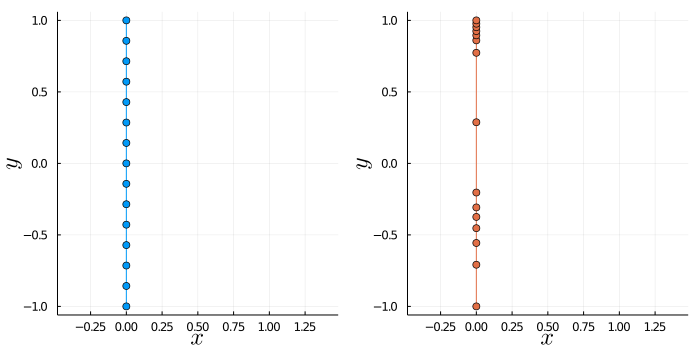

In [29]:
# Some plotting options
Tfine = 200
Tcoarse = 15

p1 = plot_curve(s1, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", size=(600, 600), guidefont=16)
plot_curve!(s1, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
savefig(p1, savepath * "curve.pdf")


p2 = plot_curve(s2, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", size=(600, 600), guidefont=16)
plot_curve!(s2, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)
savefig(p2, savepath * "curve_reparam.pdf")

plot(p1, p2, size=(700, 350))

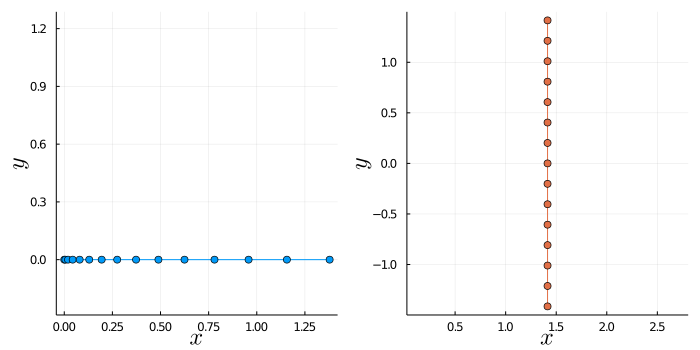

In [30]:
# Q-transforms (Want to reparametrize s1 to match s2)
# r = Q_transform(s1, Reparam.FiniteDifference(1e-4))
# q = Q_transform(s2, Reparam.FiniteDifference(1e-4))
r = Q_transform(c1, Reparam.FiniteDifference(1e-4))
q = Q_transform(c2, Reparam.FiniteDifference(1e-4))


p1 = plot_curve(r, Tfine, color=1, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(r, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
savefig(p1, savepath * "curve_transform.pdf")


p2 = plot_curve(q, Tfine, color=2, legend=false, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(q, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal)
savefig(p2, savepath * "curve_reparam_transform.pdf")


plot(p1, p2, size=(700, 350))

## Example Reparametrization
using Fourier Sine series to approximate the gradient.

In [25]:
yy(x) = (0.9^2/5 * x^5 + 0.18 / 4 * x^4 + 0.01/3 * x^3) / 0.21033

yy (generic function with 1 method)

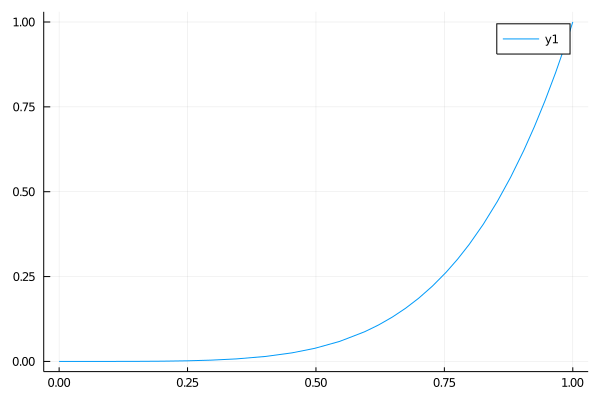

In [27]:
plot(yy, 0, 1)

In [21]:
l2_gradient(q, r)(0.)

0.0

In [31]:
myintegrator = Reparam.GaussLegendre(256)
proj = FourierProjector(8, I=myintegrator)
@time res = reparametrize(q, r, proj, maxiter=1, I=myintegrator, lsconfig=BacktrackConfig(c=0.8));
@time res = reparametrize(q, r, proj, maxiter=100, I=myintegrator, lsconfig=BacktrackConfig(c=0.3));

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 1.8284984841e+00 |                  |                  |                  |
|    1 | 1.8249980224e+00 | 1.3864643118e-02 | 6.9323215588e-04 | 2.2657930919e+00 | 1.9143913531e-03 |
 ----------------------------------------------------------------------------------
  0.233078 seconds (551.24 k allocations: 28.490 MiB)
 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 1.8284984841e+00 |                  |                  |                  |
|    1 | 1.8249980224e+00 | 1.3864

In [37]:
myintegrator = Reparam.GaussLegendre(1024)
proj = FourierProjector(3, I=myintegrator)
@time res = reparametrize(q, r, proj, RBFInterpolator(50), maxiter=1, I=myintegrator, lsconfig=BacktrackConfig(c=0.8));
@time res = reparametrize(q, r, proj, RBFInterpolator(100), maxiter=400, I=myintegrator, lsconfig=BacktrackConfig(c=0.8), rtol=1e-6);

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 1.8284984841e+00 |                  |                  |                  |
|    1 | 1.8118923994e+00 | 3.8521873702e-02 | 3.8521873702e-03 | 2.1011585117e+00 | 9.0818148308e-03 |
  0.129756 seconds (375.02 k allocations: 21.435 MiB, 13.97% gc time)
 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 1.8284984841e+00 |                  |                  |                  |
|    1 | 1.8118855277e+00 | 3.8521873702e-02 | 3.8521873702e-03 | 2.1011585117e+00 | 9.0855729466e-03 

In [ ]:
@allocated reparametrize(r, q, proj, I=myintegrator, maxiter=100, lsconfig=BacktrackConfig(c=0.8));

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 1.8284984841e+00 |                  |                  |                  |
|    1 | 1.8116234443e+00 | 7.8929867159e-02 | 3.9464933580e-03 | 2.1011585117e+00 | 9.2289055230e-03 |
|    2 | 1.7949191957e+00 | 8.7490133287e-02 | 4.3745066644e-03 | 1.9891655667e+00 | 9.2205963844e-03 |
|    3 | 1.7781507293e+00 | 9.9737561626e-02 | 4.9868780813e-03 | 1.8700591140e+00 | 9.3421845811e-03 |
|    4 | 1.7609442177e+00 | 1.1797784350e-01 | 5.8988921749e-03 | 1.7449200525e+00 | 9.6766327457e-03 |
|    5 | 1.7426530553e+00 | 1.4681513231e-01 | 7.3407566153e-03 | 1.6153480208e+00 | 1.0387133341e-02 |
|    6 | 1.7222862168e+00 | 1.9397463038e-01 | 9.6987315192e-03 | 1.4839556483e+00 | 1.1687259553e-02 |
|    7 | 1.700

In [1]:
ψ = ∘(res.reparams...)
ropt = Q_reparametrization(r, ψ)

p1 = plot_curve(r, Tfine, color=1, legend=true, label="Q(c∘γ)", xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600))
plot_curve!(r, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="")
plot_curve!(q, Tfine, color=2, label="Q(c)")
plot_curve!(q, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal, label="")
plot_curve!(ropt, Tfine, color=3, label="Q(c∘ψ)")
plot_curve!(ropt, Tcoarse, seriestype=:scatter, color=3, aspect_ratio=:equal, label="")
savefig(p1, savepath * "reparametrized_qmaps.pdf")


p2 = plot_curve(s1 ∘ γopt, Tfine, color=1, xlabel=L"x", ylabel=L"y", guidefont=16, size=(600, 600), label=L"c\circ\gamma")
plot_curve!(s1 ∘ γopt, Tcoarse, seriestype=:scatter, color=1, aspect_ratio=:equal, label="", ms=5)
plot_curve!(s1 ∘ ψ, Tfine, color=2, label=L"c\circ\psi")
plot_curve!(s1 ∘ ψ, Tcoarse, seriestype=:scatter, color=2, aspect_ratio=:equal, label="")
savefig(p2, savepath * "reparametrized_curves.pdf")




p3 = plot(ψ, 0, 1, label="Found", xlabel=L"t", ylabel=L"\gamma(t)", guidefont=16, legend=:topleft)
plot!(γopt, 0, 1, label="True", color=:black, ls=:dash)
savefig(p3, savepath * "reparametrized_diffeomorphisms.pdf")

p4 = plot(res.errors, yscale=:log10, ylabel="Error", xlabel="Iterations", legend=false, right_margin=13mm, shape=:circle)
plot!(twinx(), res.errors ./ res.errors[1], yscale=:log10, ylabel="Relative Error", legend=false)#, shape=:circle)
savefig(p4, savepath * "reparametrization_error_log.pdf")

plot(p1, p2, p3, p4,  size=(900, 900))

LoadError: UndefVarError: res not defined

## p1 = plot(res.errors, ylabel="Error", xlabel="Iterations", legend=false, right_margin=13mm, shape=:circle)
plot!(twinx(), res.errors ./ res.errors[1], ylabel="Relative Error", legend=false)#, shape=:circle)
savefig(p1, savepath * "reparametrization_error_lin.pdf")


Γ = accumulate_composition(res.reparams)

p2 = plot(Γ, 0, 1, legend=false, xlabel=L"t", ylabel=L"\gamma_n(t)", guidefont=16)
plot!(γopt, 0, 1, color=:black, ls=:dash)
savefig(p1, savepath * "diffeomorphism_stepwise.pdf")

plot(p1, p2, size=(800, 350))